In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import warnings
import xarray as xr
import numpy as np
from scipy.signal import find_peaks

os.chdir( "/Users/etmu9498/research/code/scripts/")
import make_plots
import eyewall_slope
import eyewall_slope_auto

number of tdr files: 18
Image 1 complete
Image 2 complete
Image 3 complete
Image 4 complete
Image 5 complete
Image 6 complete
Image 7 complete
Image 8 complete


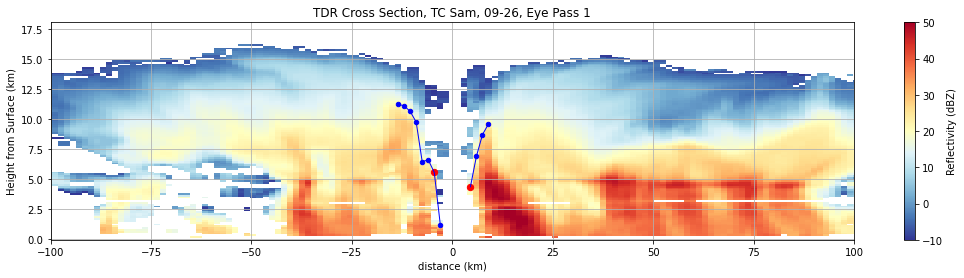

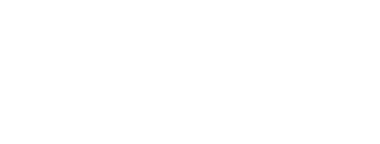

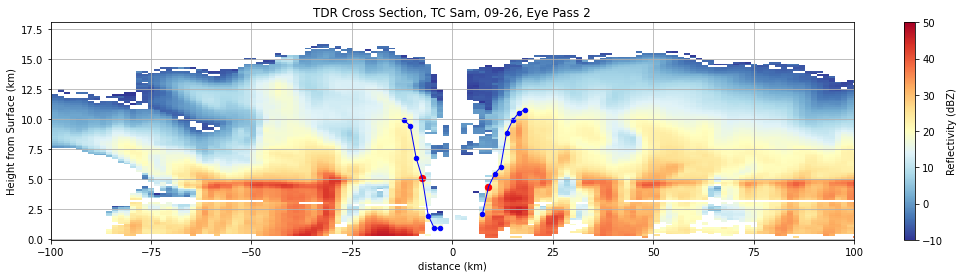

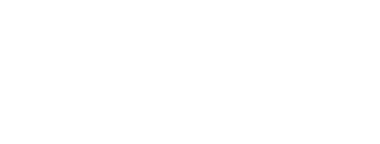

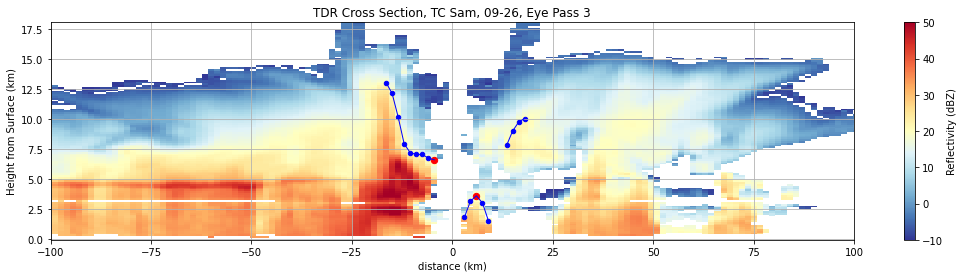

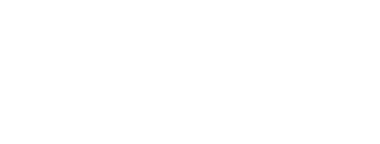

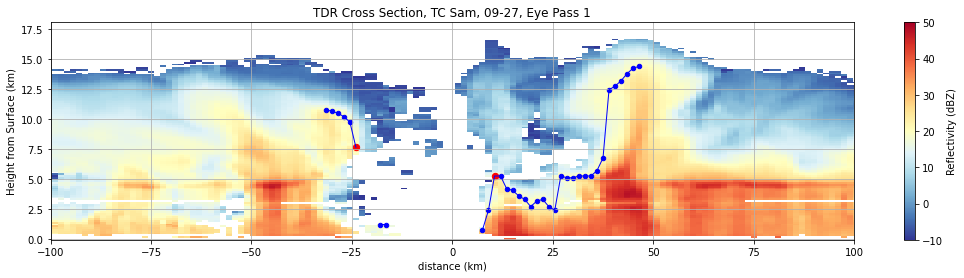

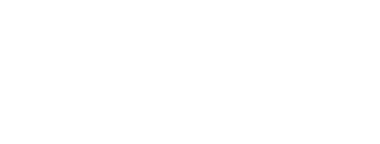

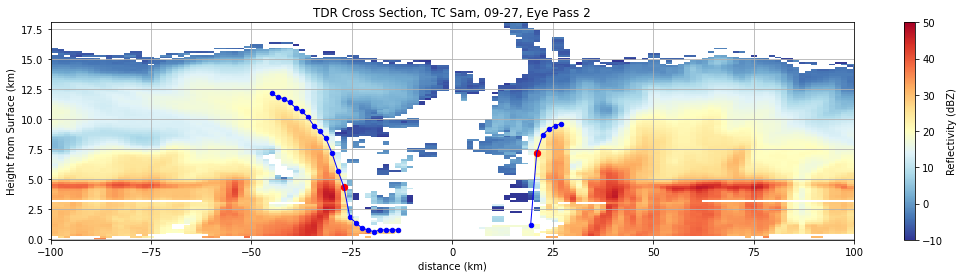

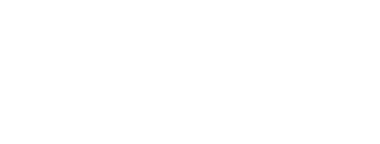

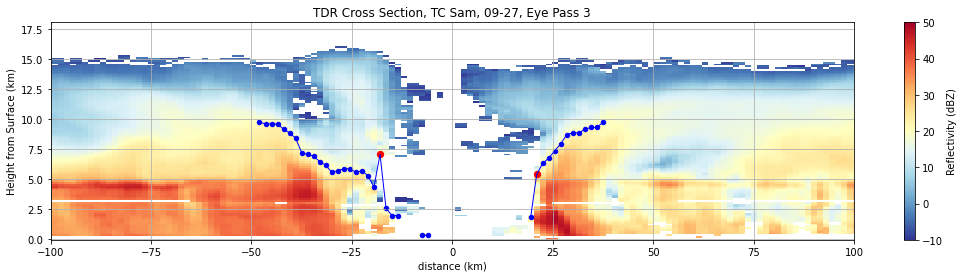

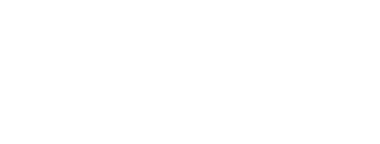

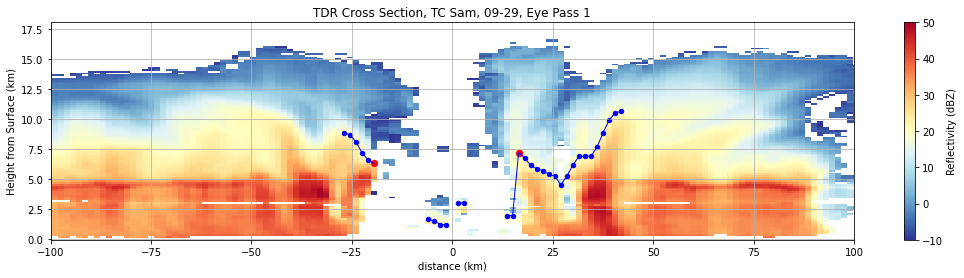

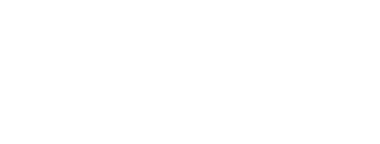

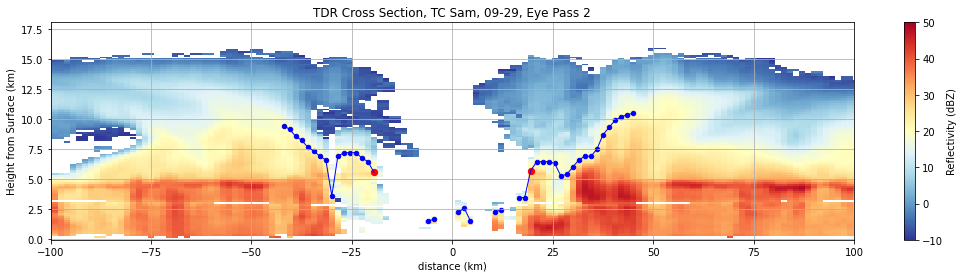

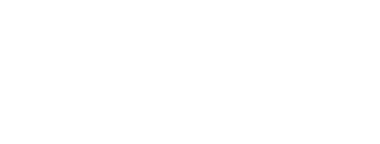

In [6]:
eyewall_slope_auto.plot_tdr_only(tc='sam')

In [2]:
# load data
sam_tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files/"
tdr_list = make_plots.load_tdr( sam_tdr_path, print_files=True)
tdr_inbound = tdr_list[12]
tdr_outbound = tdr_list[13]

os.chdir( sam_tdr_path)
inbound_data = xr.open_dataset( tdr_inbound)
inbound_data

tdr data files:
0) 210926H1_2237_vert_inbound.nc
1) 210926H1_2237_vert_outbound.nc
2) 210926H1_2350_vert_inbound.nc
3) 210926H1_2350_vert_outbound.nc
4) 210926H1_2457_vert_inbound.nc
5) 210926H1_2457_vert_outbound.nc
6) 210927H1_2205_vert_inbound.nc
7) 210927H1_2205_vert_outbound.nc
8) 210927H1_2320_vert_inbound.nc
9) 210927H1_2320_vert_outbound.nc
10) 210927H1_2433_vert_inbound.nc
11) 210927H1_2433_vert_outbound.nc
12) 210929H2_2137_vert_inbound.nc
13) 210929H2_2137_vert_outbound.nc
14) 210929H2_2249_vert_inbound.nc
15) 210929H2_2249_vert_outbound.nc
16) 210929H2_2402_vert_inbound.nc
17) 210929H2_2402_vert_outbound.nc


<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, radius: 167)
Coordinates:
  * time             (time) float32 7.785e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * radius           (radius) float32 1.5 3.0 4.5 6.0 ... 247.5 249.0 250.5
Data variables: (12/15)
    azimuth          (radius) float32 ...
    altitude         (radius) float32 ...
    latitude         (radius) float32 ...
    longitude        (radius) float32 ...
    seconds          (radius) float32 ...
    u air            (radius) float32 ...
    ...               ...
    ws air           (radius) float32 ...
    Radial_wind      (radius, heading, height, time) float32 ...
    Tangential_Wind  (radius, heading, height, time) float32 ...
    Vertical_wind    (radius, heading, height, time) float32 ...
    Wind_Speed       (radius, heading, height, time) float32 ...
    REFLECTIVITY     (radius, heading, height, time) float32 ...
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210929H2
    STMNAME:                                                SAM
    RADAR:                                                  TAIL
    EXPERIMENT:                                             SAM
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 77853.0
    ETIME1:                                                 77853.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

In [3]:
# originally, a copy of the function I'm using to plot tdr reflectivity
# I added this here to make it easier to visualize changes made when sorting data!

cutoff = 20

def test_plot_tdr( tdr_path, inbound_name, outbound_name, xaxis):

    warnings.filterwarnings("ignore")

    # get data
    os.chdir( tdr_path)
    inbound_data = xr.open_dataset( inbound_name)
    outbound_data = xr.open_dataset( outbound_name)

    # choose x axis type
    if xaxis == 'lon':
        x_label = 'longitude (degrees)'
        xaxis_out = outbound_data.longitude [ ~np.isnan( outbound_data.longitude)] # np.nan_to_num() as an alternative?
        xaxis_in =  inbound_data.longitude[ ~np.isnan( inbound_data.longitude)]
    elif xaxis == 'lat':
        x_label = 'latitude (degrees)'
        xaxis_out = outbound_data.latitude[ ~np.isnan( outbound_data.latitude)]
        # min_lat = np.min( inbound_data.latitude)
        # max_lat = np.max( inbound_data.latitude)
        xaxis_in = inbound_data.latitude[ ~np.isnan( inbound_data.latitude)]
        # xaxis_in = np.linspace( max_lat, min_lat, len( xaxis_in))
        # plt.gca().invert_xaxis()
    elif xaxis == 'distance':
        xaxis_in = - inbound_data.radius
        xaxis_out =  outbound_data.radius
        x_label = 'distance (km)'
    else:
        print("Error: Please Choose 'lat', 'lon', 'time', or 'distance' for the x axis")
        return

    # make plot
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()
    # color_map = 'bwr' # use this to get a sense of which data points will be included / excluded!
    # divnorm = colors.TwoSlopeNorm(vmin=-10, vcenter=20, vmax=50)

    
    # plot outbound data
    # get rid of nans and resize array to get rid of overlapping data
    reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()

    reflectivity = reflectivity[:, range( len( xaxis_out) )]
    # reflectivity = reflectivity.where( reflectivity.values > cutoff)


    # print( 'number of outbound points: ' + str( len( xaxis_out)) )

    if len( xaxis_out) != 0:
        plt.pcolormesh( xaxis_out, outbound_data.height, reflectivity, cmap = color_map, vmin = -10, vmax = 50 ) # norm=divnorm)

    # Plot inbound data
    reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()

    reflectivity = reflectivity[:, range( len( xaxis_in) )]
    # reflectivity = reflectivity.where( reflectivity.values > cutoff)

    # print( 'number of inbound points: ' + str( len( xaxis_in)) )

    if len( xaxis_in) != 0:
        plt.pcolormesh( xaxis_in, inbound_data.height, reflectivity, cmap = color_map, vmin = -10, vmax = 50 ) # norm=divnorm)

    # making things prettier
    if len( xaxis_in) != 0 or len( xaxis_out) != 0:
        plt.colorbar( label="Reflectivity (dBZ)")
    plt.ylabel( 'Height from Surface (km)')
    plt.xlabel( x_label)
    plt.grid( 'on')
    # plt.gca().invert_xaxis()

    warnings.filterwarnings("default")


In [4]:
# testing out the eyewall slope algorithm!

x_in, x_out, H_in, H_out = eyewall_slope.eyewall_slope_first_val( sam_tdr_path, tdr_inbound, tdr_outbound)

instartx, outstartx, instarth, outstarth = eyewall_slope.eyewall_start( sam_tdr_path, tdr_inbound, tdr_outbound)

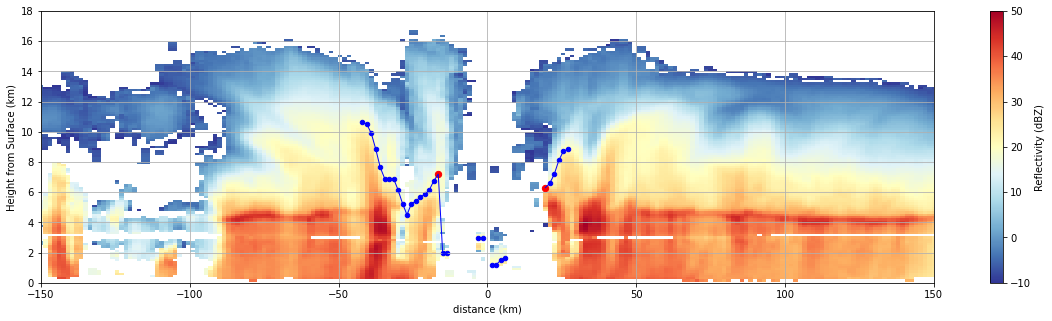

In [5]:
# visualizing the eye / eyewall from TDR data
# evenually, the goal is to plot points on this plot showing the slope of the eyewall!

plt.figure( figsize=(20, 5))
test_plot_tdr( sam_tdr_path, tdr_inbound, tdr_outbound, 'distance')
# plt.xlim( [-51, -50])
plt.xlim( [-150, 150])
plt.ylim( [0, 18])

plt.scatter( x_in, H_in, c='b', s=20)
plt.plot( x_in, H_in, c='b', linewidth=1)
plt.scatter( instartx, instarth, c='r', s=40)

plt.scatter( x_out, H_out, c='b', s=20)
plt.plot( x_out, H_out, c='b', linewidth=1)
plt.scatter( outstartx, outstarth, c='r', s=40)